In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pydea as dea
import pandas as pd
from datetime import datetime

In [2]:
from scipy import stats
import itertools
import statsmodels.api as sm
import warnings
import statsmodels.formula.api as smf
import statsmodels.stats.api as sms
from statsmodels.graphics.regressionplots import plot_leverage_resid2
from statsmodels.stats import diagnostic
import matplotlib.pyplot as plt
import scipy as sc
from sklearn.linear_model import Lasso
from sklearn import metrics
from sklearn.preprocessing import StandardScaler as SS
warnings.filterwarnings('ignore')


In [3]:
rf=pd.read_csv('gazprom2.csv',sep=';',decimal=',')
rf.index=list(map(lambda x: datetime(x,12,31,0,0,0),rf.year))
rf.head()

,year,FSI,SGI,Production,Reserves,EROI,ES,ER,EE,ROEenv,...,CurrentAssets,Liabilities,Debt,SFRatio,NetCash,ROS,ROA,ROE,CurrentRatio,EV_EBITDA
1996-12-31,1996,0.044654,0.20,487.0,27593.0,83.0,1725.0,0.8,15.0600,0.01,...,945968,1018574,786598,1.02,869567,0.15,0.05,0.07,1.23,1.0
1997-12-31,1997,0.137185,0.18,497.0,27679.0,81.0,1823.0,0.9,17.4320,0.01,...,980685,1058576,896754,1.05,906854,0.13,0.04,0.06,1.24,2.0
1998-12-31,1998,0.153460,0.16,485.0,27986.0,78.0,1898.0,1.0,14.3240,0.02,...,978695,1104898,976435,1.10,967584,0.11,0.05,0.08,1.37,1.0
1999-12-31,1999,0.185716,0.12,457.0,28095.0,84.0,1700.0,1.1,18.3475,0.02,...,1014566,1259067,967584,1.09,987569,0.14,0.03,0.09,1.11,2.0
2000-12-31,2000,0.234625,0.14,510.0,28104.0,83.0,1788.0,1.2,16.3400,0.04,...,1104758,1362891,1010567,1.04,968594,0.13,0.04,0.07,1.05,3.0


In [4]:
rrrr=list(rf.columns)
rrrr[1]='SGSI'
rrrr[2]='SGR'
rf.columns=rrrr
rf.columns

Index(['year', 'SGSI', 'SGR', 'Production', 'Reserves', 'EROI', 'ES', 'ER',
       'EE', 'ROEenv', 'FOORPRINT', 'BIOCAPACITY', 'Emissions',
       'RecultivatedArea', 'Discharge', 'SE', 'ROL', 'PE', 'NP', 'FL', 'RDS',
       'CE', 'SalesRevenue', 'OperatinExpenses', 'EBITDA', 'Assets',
       'CurrentAssets', 'Liabilities', 'Debt', 'SFRatio', 'NetCash', 'ROS',
       'ROA', 'ROE', 'CurrentRatio', 'EV_EBITDA'],
      dtype='object')

In [5]:
for el in rf.columns[3:]:
    rf[el]=rf[el]/np.max(rf[el])

In [6]:
rfR=rf[rf.year<2017]
rfR.tail()

,year,SGSI,SGR,Production,Reserves,EROI,ES,ER,EE,ROEenv,...,CurrentAssets,Liabilities,Debt,SFRatio,NetCash,ROS,ROA,ROE,CurrentRatio,EV_EBITDA
2012-12-31,2012,0.446246,0.135662,0.771773,0.819265,0.891667,0.650000,0.967742,0.597648,0.213028,...,0.606152,0.702248,0.435938,0.717105,0.773495,0.019087,0.066667,0.10,0.775120,0.571429
2013-12-31,2013,0.512562,0.124100,0.850485,0.806429,0.950000,0.691910,0.761290,0.762759,0.184258,...,0.716793,0.654899,0.523479,0.822368,0.881235,0.020450,0.333333,0.40,0.985646,0.666667
2014-12-31,2014,0.527870,0.022356,0.858144,0.855094,0.845238,0.739493,0.987097,0.767608,0.310369,...,0.866649,0.873510,0.781132,1.000000,0.866088,0.015678,0.400000,0.45,0.889952,1.000000
2015-12-31,2015,0.532429,0.090423,0.816037,0.858093,0.904762,0.801493,1.000000,0.779973,0.260678,...,1.000000,1.000000,1.000000,0.815789,1.000000,0.013633,0.533333,0.35,0.899522,0.571429
2016-12-31,2016,0.526344,0.142741,0.816706,0.870946,0.880952,0.824478,0.864516,0.826767,0.211959,...,0.809858,0.904508,0.822036,0.756579,0.868888,0.008180,0.333333,0.30,0.803828,0.595238


In [7]:
rf.columns[3:]

Index(['Production', 'Reserves', 'EROI', 'ES', 'ER', 'EE', 'ROEenv',
       'FOORPRINT', 'BIOCAPACITY', 'Emissions', 'RecultivatedArea',
       'Discharge', 'SE', 'ROL', 'PE', 'NP', 'FL', 'RDS', 'CE', 'SalesRevenue',
       'OperatinExpenses', 'EBITDA', 'Assets', 'CurrentAssets', 'Liabilities',
       'Debt', 'SFRatio', 'NetCash', 'ROS', 'ROA', 'ROE', 'CurrentRatio',
       'EV_EBITDA'],
      dtype='object')

In [8]:
xColumns=rf.columns[3:]
envColumns=np.array(['ER', 'EE', 'ROEenv', 'FOORPRINT', 'BIOCAPACITY', 'Emissions', 'RecultivatedArea', 'Discharge'])
finColumns=np.array(['SE', 'PE', 'NP', 'FL', 'RDS', 'CE', 'SalesRevenue',
       'OperatinExpenses', 'EBITDA', 'Assets', 'CurrentAssets', 'Liabilities',
       'Debt', 'SFRatio', 'NetCash', 'ROS', 'ROA', 'ROE', 'CurrentRatio','EV_EBITDA'])
socColumns=np.array(['Production', 'Reserves', 'EROI', 'ES', 'SE', 'PE'])
rfR[envColumns].head()

,ER,EE,ROEenv,FOORPRINT,BIOCAPACITY,Emissions,RecultivatedArea,Discharge
1996-12-31,0.516129,0.365135,0.058824,0.802365,0.922636,0.943520,0.026316,0.834308
1997-12-31,0.580645,0.422645,0.058824,0.822635,0.942693,1.000000,0.056140,0.839057
1998-12-31,0.645161,0.347291,0.117647,0.739865,0.901146,0.902649,0.040351,0.706796
1999-12-31,0.709677,0.444842,0.117647,0.756757,0.914040,0.833641,0.136842,0.837231
2000-12-31,0.774194,0.396169,0.235294,0.793919,0.931232,0.799959,0.075439,0.721045


In [9]:
rfR[xColumns].corr()

,Production,Reserves,EROI,ES,ER,EE,ROEenv,FOORPRINT,BIOCAPACITY,Emissions,...,CurrentAssets,Liabilities,Debt,SFRatio,NetCash,ROS,ROA,ROE,CurrentRatio,EV_EBITDA
Production,1.000000,-0.298554,0.232466,0.212622,-0.055300,-0.303425,0.362695,0.150995,0.471681,-0.137569,...,-0.123320,-0.410056,-0.203396,0.027158,-0.079651,0.423262,0.633908,0.621644,0.367078,0.110532
Reserves,-0.298554,1.000000,-0.790108,0.632801,0.628348,0.914312,0.349665,0.750299,0.449821,-0.807267,...,0.942704,0.809933,0.890952,0.217845,0.865032,0.295570,-0.092724,-0.217448,0.535253,0.346710
EROI,0.232466,-0.790108,1.000000,-0.491564,-0.415247,-0.673638,-0.279455,-0.535417,-0.309570,0.584814,...,-0.734335,-0.644386,-0.710187,-0.389910,-0.564052,-0.145928,0.031802,0.217892,-0.371383,-0.335894
ES,0.212622,0.632801,-0.491564,1.000000,0.229853,0.631038,0.624729,0.855033,0.696981,-0.805338,...,0.689794,0.221173,0.643989,0.443793,0.726992,0.587981,0.621415,0.514621,0.738448,0.620024
ER,-0.055300,0.628348,-0.415247,0.229853,1.000000,0.499339,0.400037,0.406577,0.323210,-0.600048,...,0.600069,0.675570,0.515833,-0.072497,0.629039,0.288262,-0.139450,-0.204491,0.313872,-0.009150
EE,-0.303425,0.914312,-0.673638,0.631038,0.499339,1.000000,0.277913,0.675923,0.394418,-0.775462,...,0.918646,0.737679,0.874365,0.384512,0.768407,0.245895,-0.012884,-0.125283,0.563275,0.410287
ROEenv,0.362695,0.349665,-0.279455,0.624729,0.400037,0.277913,1.000000,0.515524,0.513607,-0.643938,...,0.380790,0.054286,0.299732,0.106354,0.436166,0.602651,0.587592,0.539610,0.482600,0.353897
FOORPRINT,0.150995,0.750299,-0.535417,0.855033,0.406577,0.675923,0.515524,1.000000,0.798552,-0.830080,...,0.772349,0.362865,0.653259,0.329622,0.818338,0.685433,0.373537,0.238546,0.794522,0.600973
BIOCAPACITY,0.471681,0.449821,-0.309570,0.696981,0.323210,0.394418,0.513607,0.798552,1.000000,-0.693301,...,0.603267,0.176699,0.486478,0.243863,0.670769,0.653984,0.581059,0.456966,0.707233,0.597236
Emissions,-0.137569,-0.807267,0.584814,-0.805338,-0.600048,-0.775462,-0.643938,-0.830080,-0.693301,1.000000,...,-0.870355,-0.564787,-0.785377,-0.332457,-0.823906,-0.546778,-0.347496,-0.235878,-0.749324,-0.586883


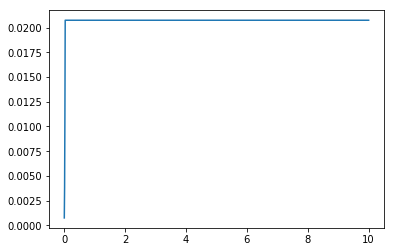

In [10]:
als=np.linspace(0.001,10,1000)
dd=[]
bm=0
rrr=float('inf')
for el in als:
    ls=Lasso(alpha=el,normalize=True)
    ls.fit(rfR[envColumns],rfR.SGSI)
    rr1=metrics.mean_squared_error(rfR.SGSI,ls.predict(rfR[envColumns]))
    if rr1<rrr:
        bm=ls
        rrr=rr1
    dd.append(rr1)
plt.plot(als,dd)

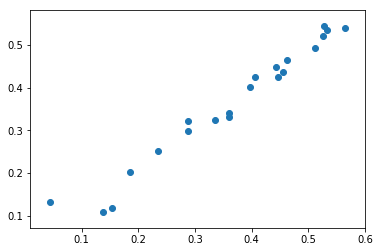

In [11]:
plt.scatter(rfR.SGSI,bm.predict(rfR[envColumns]))

In [12]:
np.array(list(zip(envColumns[np.abs(bm.coef_)>1e-10],bm.coef_[np.abs(bm.coef_)>1e-10])))

array([['EE', '0.01774039235875969'],
       ['ROEenv', '0.06953846683852657'],
       ['FOORPRINT', '0.4674322405831795'],
       ['BIOCAPACITY', '0.4685107956672709'],
       ['Emissions', '-0.7961414049731634'],
       ['RecultivatedArea', '0.022306312927753532'],
       ['Discharge', '0.0945617196843488']], dtype='<U20')

In [13]:
el='SGSI'
ss1=' ~ FOORPRINT + Emissions + Discharge'
sss=el+ss1
m1 = smf.ols(sss,data=rfR)
fitted = m1.fit(cov_type='HC1')
print (fitted.summary())

                            OLS Regression Results                            
Dep. Variable:                   SGSI   R-squared:                       0.962
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     122.6
Date:                Sat, 15 Feb 2020   Prob (F-statistic):           1.03e-11
Time:                        15:51:36   Log-Likelihood:                 45.220
No. Observations:                  21   AIC:                            -82.44
Df Residuals:                      17   BIC:                            -78.26
Df Model:                           3                                         
Covariance Type:                  HC1                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.3714      0.283      1.313      0.1

In [14]:
np.array(list(zip(envColumns[np.abs(bm.coef_)>1e-10],bm.coef_[np.abs(bm.coef_)>1e-10])))

array([['EE', '0.01774039235875969'],
       ['ROEenv', '0.06953846683852657'],
       ['FOORPRINT', '0.4674322405831795'],
       ['BIOCAPACITY', '0.4685107956672709'],
       ['Emissions', '-0.7961414049731634'],
       ['RecultivatedArea', '0.022306312927753532'],
       ['Discharge', '0.0945617196843488']], dtype='<U20')

In [15]:
el='SGR'
ss1=' ~ EE + FOORPRINT + Emissions'
sss=el+ss1
m1 = smf.ols(sss,data=rfR)
fitted = m1.fit(cov_type='HC1')
print (fitted.summary())

                            OLS Regression Results                            
Dep. Variable:                    SGR   R-squared:                       0.625
Model:                            OLS   Adj. R-squared:                  0.559
Method:                 Least Squares   F-statistic:                     8.777
Date:                Sat, 15 Feb 2020   Prob (F-statistic):           0.000972
Time:                        15:51:38   Log-Likelihood:                 49.069
No. Observations:                  21   AIC:                            -90.14
Df Residuals:                      17   BIC:                            -85.96
Df Model:                           3                                         
Covariance Type:                  HC1                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.4399      0.159     -2.770      0.0

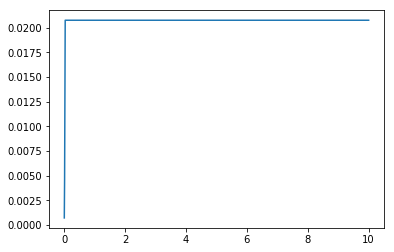

In [16]:
als=np.linspace(0.001,10,1000)
dd=[]
bm=0
rrr=float('inf')
for el in als:
    ls=Lasso(alpha=el,normalize=True)
    ls.fit(rfR[finColumns],rfR.SGSI)
    rr1=metrics.mean_squared_error(rfR.SGSI,ls.predict(rfR[finColumns]))
    if rr1<rrr:
        bm=ls
        rrr=rr1
    dd.append(rr1)
plt.plot(als,dd)

In [17]:
np.array(list(zip(finColumns[np.abs(bm.coef_)>1e-10],bm.coef_[np.abs(bm.coef_)>1e-10])))

array([['SE', '0.25619399981001556'],
       ['PE', '0.4097984934291965'],
       ['FL', '0.18998696696154183'],
       ['EBITDA', '0.0671911595614554'],
       ['SFRatio', '-0.05064363504548457'],
       ['NetCash', '0.03520931757123236'],
       ['ROS', '5.1451079302148965'],
       ['ROA', '0.0011256453916226271'],
       ['ROE', '0.023302554780397035']], dtype='<U21')

In [18]:
el='SGSI'
ss1=' ~ SE + PE + FL + SFRatio'
sss=el+ss1
m1 = smf.ols(sss,data=rfR)
fitted = m1.fit(cov_type='HC1')
print (fitted.summary())

                            OLS Regression Results                            
Dep. Variable:                   SGSI   R-squared:                       0.939
Model:                            OLS   Adj. R-squared:                  0.924
Method:                 Least Squares   F-statistic:                     43.40
Date:                Sat, 15 Feb 2020   Prob (F-statistic):           2.14e-08
Time:                        15:51:45   Log-Likelihood:                 40.249
No. Observations:                  21   AIC:                            -70.50
Df Residuals:                      16   BIC:                            -65.28
Df Model:                           4                                         
Covariance Type:                  HC1                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.2122      0.059     -3.571      0.0

In [19]:
rfR[finColumns].head()

,SE,PE,NP,FL,RDS,CE,SalesRevenue,OperatinExpenses,EBITDA,Assets,CurrentAssets,Liabilities,Debt,SFRatio,NetCash,ROS,ROA,ROE,CurrentRatio,EV_EBITDA
1996-12-31,0.184274,0.181488,0.296949,0.616642,0.033333,0.364336,0.422281,0.280445,0.332471,0.406797,0.236864,0.479396,0.228515,0.671053,0.522527,0.010225,0.333333,0.35,0.588517,0.238095
1997-12-31,0.206940,0.205801,0.260743,0.575532,0.046667,0.382405,0.439339,0.293131,0.370111,0.351932,0.245557,0.498224,0.260517,0.690789,0.544933,0.008862,0.266667,0.30,0.593301,0.476190
1998-12-31,0.284703,0.223807,0.323078,0.554977,0.066667,0.310494,0.450223,0.327515,0.470903,0.405810,0.245058,0.520025,0.283665,0.723684,0.581426,0.007498,0.333333,0.40,0.655502,0.238095
1999-12-31,0.239188,0.255831,0.486409,0.637196,0.200000,0.415743,0.456596,0.337252,0.499773,0.351672,0.254040,0.592585,0.281093,0.717105,0.593435,0.009543,0.200000,0.45,0.531100,0.476190
2000-12-31,0.372786,0.277224,0.439178,0.518493,0.133333,0.357141,0.471739,0.351604,0.541634,0.293432,0.276624,0.641451,0.293580,0.684211,0.582033,0.008862,0.266667,0.35,0.502392,0.714286


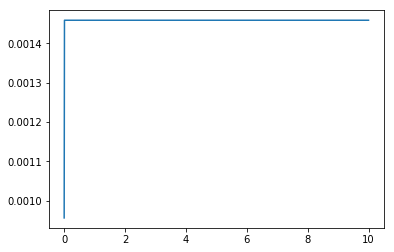

In [20]:
als=np.linspace(0.001,10,1000)
dd=[]
bm=0
rrr=float('inf')
for el in als:
    ls=Lasso(alpha=el,normalize=True)
    ls.fit(rfR[socColumns],rfR.SGR)
    rr1=metrics.mean_squared_error(rfR.SGR,ls.predict(rfR[socColumns]))
    if rr1<rrr:
        bm=ls
        rrr=rr1
    dd.append(rr1)
plt.plot(als,dd)

In [21]:
np.array(list(zip(socColumns[np.abs(bm.coef_)>1e-10],bm.coef_[np.abs(bm.coef_)>1e-10])))

array([['EROI', '0.1512715395518049'],
       ['ES', '0.033861624565045406'],
       ['SE', '-0.020593351399785374'],
       ['PE', '-0.08554813222483462']], dtype='<U21')

In [22]:
el='SGR'
ss1=' ~ ES + PE'
sss=el+ss1
m1 = smf.ols(sss,data=rfR)
fitted = m1.fit(cov_type='HC1')
print (fitted.summary())

                            OLS Regression Results                            
Dep. Variable:                    SGR   R-squared:                       0.388
Model:                            OLS   Adj. R-squared:                  0.320
Method:                 Least Squares   F-statistic:                     3.407
Date:                Sat, 15 Feb 2020   Prob (F-statistic):             0.0556
Time:                        15:51:52   Log-Likelihood:                 43.922
No. Observations:                  21   AIC:                            -81.84
Df Residuals:                      18   BIC:                            -78.71
Df Model:                           2                                         
Covariance Type:                  HC1                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.1334      0.031      4.317      0.0

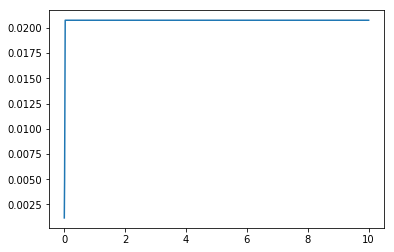

In [23]:
als=np.linspace(0.001,10,1000)
dd=[]
bm=0
rrr=float('inf')
for el in als:
    ls=Lasso(alpha=el,normalize=True)
    ls.fit(rfR[socColumns],rfR.SGSI)
    rr1=metrics.mean_squared_error(rfR.SGSI,ls.predict(rfR[socColumns]))
    if rr1<rrr:
        bm=ls
        rrr=rr1
    dd.append(rr1)
plt.plot(als,dd)

In [24]:
np.array(list(zip(socColumns[np.abs(bm.coef_)>1e-10],bm.coef_[np.abs(bm.coef_)>1e-10])))

array([['Production', '0.3291176084711541'],
       ['Reserves', '0.1892711664417794'],
       ['EROI', '0.2363012562425225'],
       ['ES', '0.3405410594258829'],
       ['SE', '0.35824910136657867'],
       ['PE', '0.28599895058906727']], dtype='<U19')

In [25]:
el='SGSI'
ss1=' ~ Production + PE'
sss=el+ss1
m1 = smf.ols(sss,data=rfR)
fitted = m1.fit(cov_type='HC1')
print (fitted.summary())

                            OLS Regression Results                            
Dep. Variable:                   SGSI   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.824
Method:                 Least Squares   F-statistic:                     45.86
Date:                Sat, 15 Feb 2020   Prob (F-statistic):           8.61e-08
Time:                        15:51:56   Log-Likelihood:                 30.264
No. Observations:                  21   AIC:                            -54.53
Df Residuals:                      18   BIC:                            -51.39
Df Model:                           2                                         
Covariance Type:                  HC1                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.6898      0.183     -3.770      0.0

In [26]:
rfR[['SE', 'PE', 'FL', 'SFRatio', 'ROS', 'ROE']].corr()

,SE,PE,FL,SFRatio,ROS,ROE
SE,1.000000,0.816740,0.561586,0.426447,0.543794,0.128157
PE,0.816740,1.000000,0.458236,0.280506,0.273446,-0.100597
FL,0.561586,0.458236,1.000000,0.293158,0.667782,0.623883
SFRatio,0.426447,0.280506,0.293158,1.000000,0.393809,0.392104
ROS,0.543794,0.273446,0.667782,0.393809,1.000000,0.545067
ROE,0.128157,-0.100597,0.623883,0.392104,0.545067,1.000000


In [27]:
el='SGSI'
ss1=' ~ Production + PE'
sss=el+ss1
m1 = smf.ols(sss,data=rfR)
fitted = m1.fit(cov_type='HC1')
print (fitted.summary())

                            OLS Regression Results                            
Dep. Variable:                   SGSI   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.824
Method:                 Least Squares   F-statistic:                     45.86
Date:                Sat, 15 Feb 2020   Prob (F-statistic):           8.61e-08
Time:                        15:51:57   Log-Likelihood:                 30.264
No. Observations:                  21   AIC:                            -54.53
Df Residuals:                      18   BIC:                            -51.39
Df Model:                           2                                         
Covariance Type:                  HC1                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.6898      0.183     -3.770      0.0

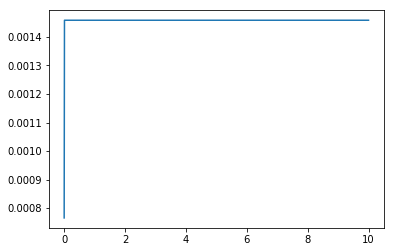

In [28]:
als=np.linspace(0.001,10,1000)
dd=[]
bm=0
rrr=float('inf')
for el in als:
    ls=Lasso(alpha=el,normalize=True)
    ls.fit(rfR[envColumns],rfR.SGR)
    rr1=metrics.mean_squared_error(rfR.SGR,ls.predict(rfR[envColumns]))
    if rr1<rrr:
        bm=ls
        rrr=rr1
    dd.append(rr1)
plt.plot(als,dd)

In [29]:
el='SGSI'
ss1=' ~ Production + ES + ER + SE + PE + EBITDA'
sss=el+ss1
m1 = smf.ols(sss,data=rfR)
fitted = m1.fit(cov_type='HC1')
print (fitted.summary())

                            OLS Regression Results                            
Dep. Variable:                   SGSI   R-squared:                       0.974
Model:                            OLS   Adj. R-squared:                  0.963
Method:                 Least Squares   F-statistic:                     88.87
Date:                Sat, 15 Feb 2020   Prob (F-statistic):           2.47e-10
Time:                        15:52:03   Log-Likelihood:                 49.168
No. Observations:                  21   AIC:                            -84.34
Df Residuals:                      14   BIC:                            -77.02
Df Model:                           6                                         
Covariance Type:                  HC1                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.5574      0.113     -4.923      0.0

In [30]:
rf1=rf.copy()

In [31]:
rf1['SGSI']=rf1['SGSI']/np.max(rf1['SGSI'])
rf1['SGR']=rf1['SGR']/np.max(rf1['SGR'])


In [32]:
from matplotlib import patches

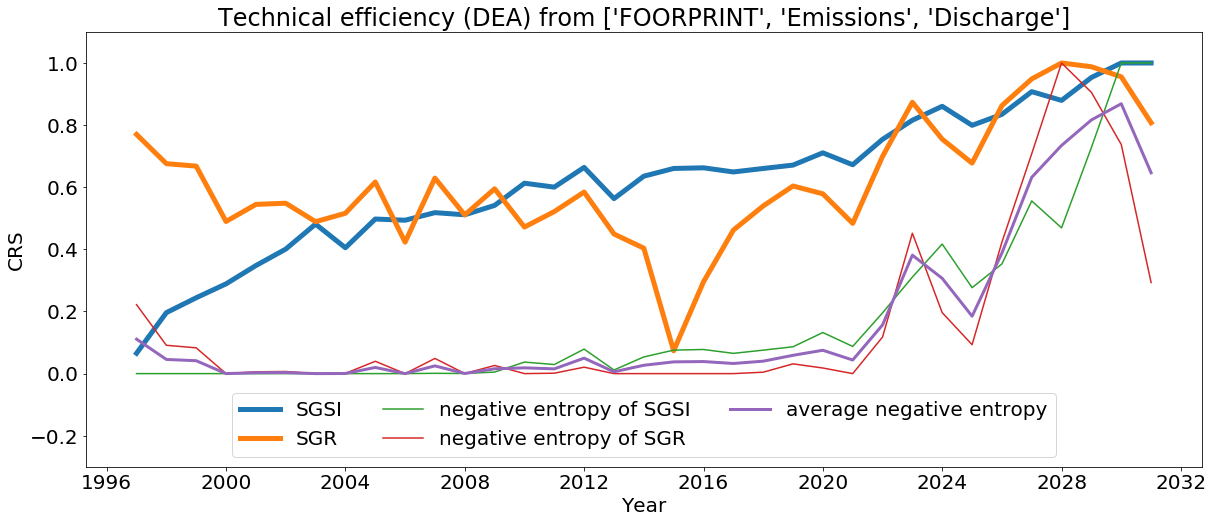

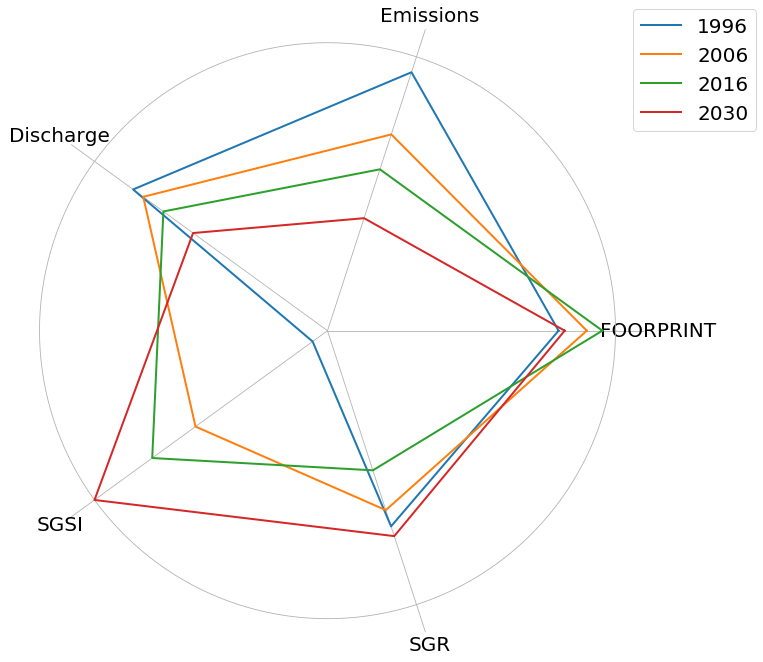

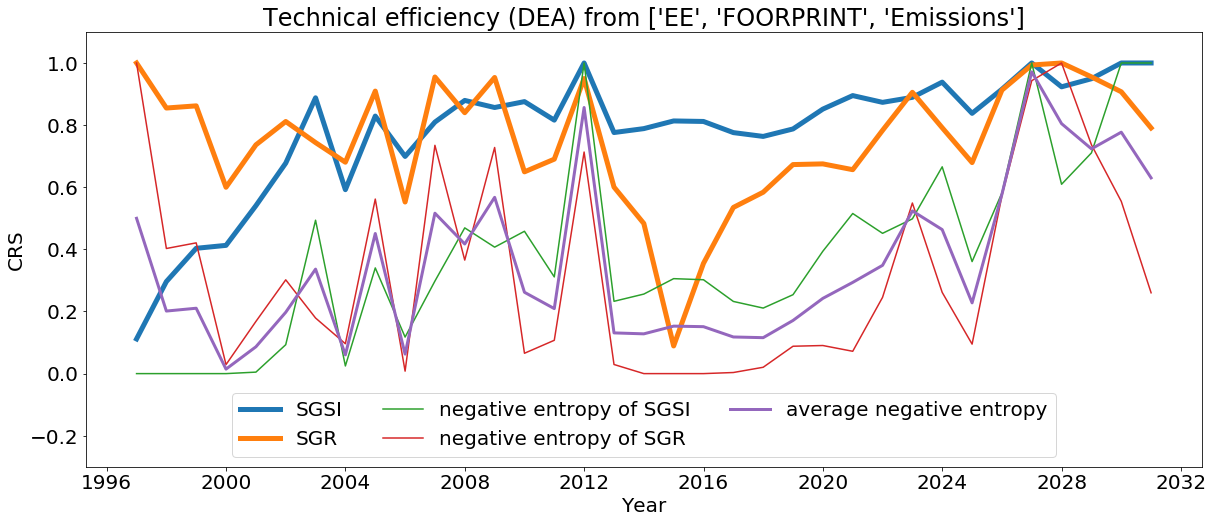

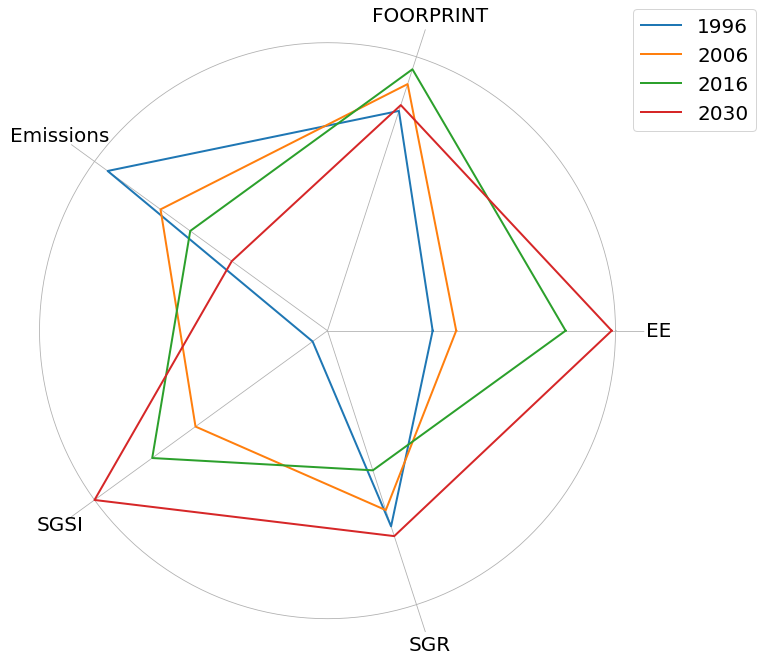

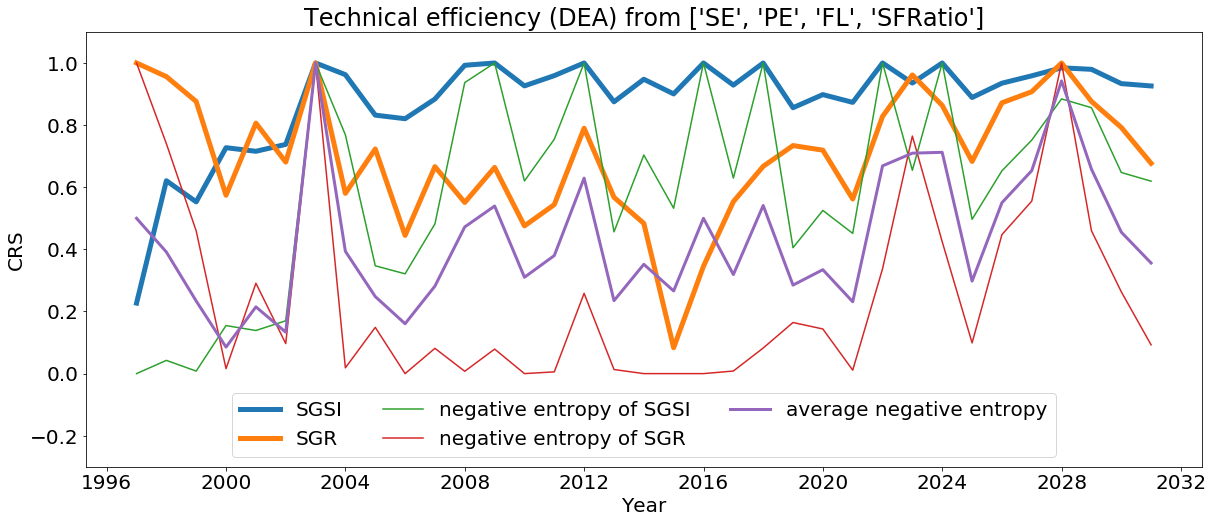

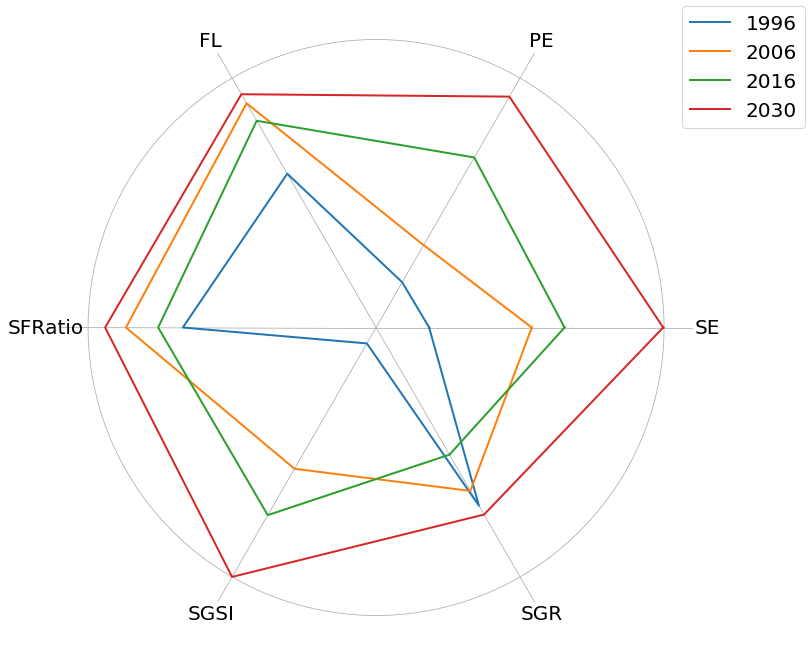

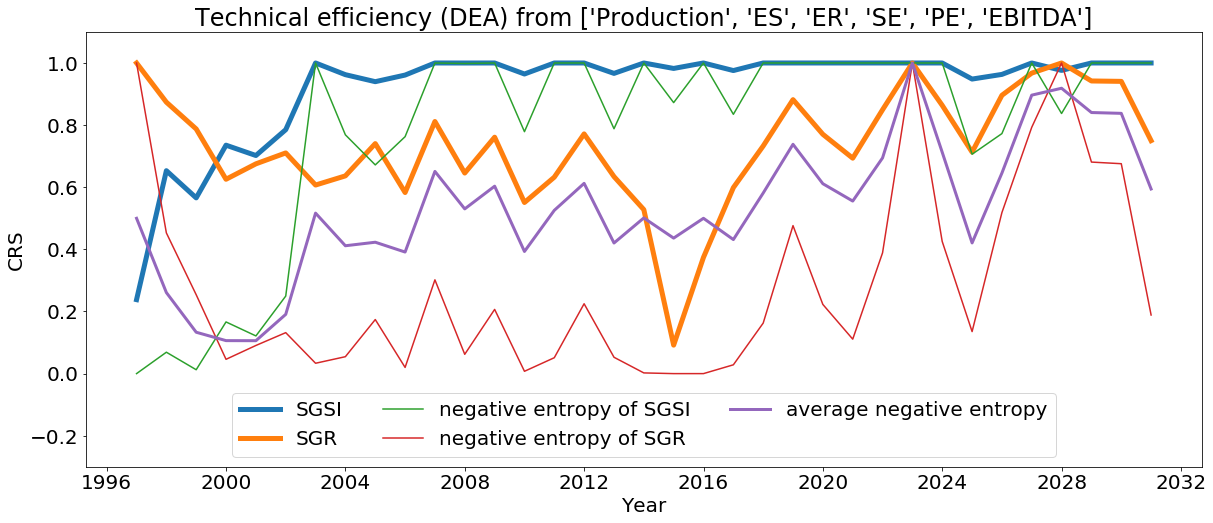

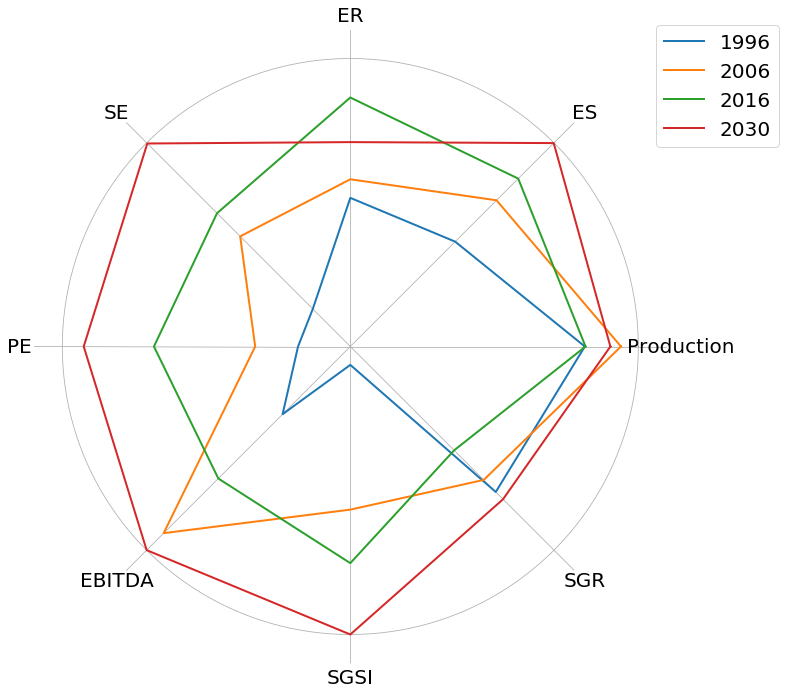

In [34]:
params=[['FOORPRINT', 'Emissions', 'Discharge'], ['EE', 'FOORPRINT', 'Emissions'], ['SE', 'PE', 'FL', 'SFRatio'], 
        ['Production', 'ES', 'ER', 'SE', 'PE', 'EBITDA']]
yColumns1=['SGSI']
yColumns2=['SGR']
yColumns3=['EROI','ES']
plt.rcParams['font.size'] = 20
ii=1
for xColumns in params:
    primDEA_CRS1 = dea.DEAProblem(rf[xColumns], rf[yColumns1], returns='CRS')
    primDEA_CRS2 = dea.DEAProblem(rf[xColumns], rf[yColumns2], returns='CRS')
    primResults_CRS1 = primDEA_CRS1.solve()
    primResults_CRS2 = primDEA_CRS2.solve()
    x1=primResults_CRS1['Efficiency']
    x2=primResults_CRS2['Efficiency']
    x3=1+x1*np.log2(x1)+(1-x1)*np.log2(list(map(lambda x: 1 if (x>=1) else (1-x),x1)))
    x4=1+x2*np.log2(x2)+(1-x2)*np.log2(list(map(lambda x: 1 if (x>=1) else (1-x),x2)))
    x3=x3*np.int32(x1>=0.5)
    x4=x4*np.int32(x2>=0.5)
    x5=(x4+x3)/2
    plt.figure(figsize=(20,8))
    plt.plot (x1, linewidth=5)
    plt.plot (x2, linewidth=5)
    plt.plot (x3)
    plt.plot (x4)
    plt.plot (x5, linewidth=3)
    plt.ylim((-0.3,1.1))
    plt.legend(['SGSI', 'SGR','negative entropy of SGSI','negative entropy of SGR', 
                'average negative entropy'], loc="lower center",ncol=3)
#    plt.subplots_adjust(left=0.0, bottom=0.0, right=0.7)
    plt.title('Technical efficiency (DEA) from {}'.format(xColumns))
    plt.xlabel('Year')
    plt.ylabel("CRS")
    ii+=1
    plt.savefig('C:/python/china/fig'+str(ii)+'.jpg',dpi=300)
    plt.show()
    
    
    xxx=list(xColumns)+['SGSI', 'SGR']
    angels=np.linspace(0,2*np.pi,len(xxx)+1)
    masX=[1996,2006,2016,2030]
    fig=plt.figure(figsize=(17,10))
    ax= plt.subplot(111,polar=True,frameon=False)
    ax.patch.set_visible(False)

    plt.xticks(angels[:-1],xxx,size=20)
    ax.set_rlabel_position(0)
    plt.yticks(range(1,10),range(1,10),fontsize=1)
    plt.ylim(0,1.1)
    for el in masX:
        ttt=list(np.array(rf1[xxx][rf.year==el])[0])
        ttt.append(ttt[0])
        ax.plot(angels,ttt,linestyle='solid',linewidth=2)
    plt.legend(masX,bbox_to_anchor=(0.8,0.9), loc="upper center", fontsize=20,  
                bbox_transform=plt.gcf().transFigure)
    plt.subplots_adjust(left=0.0, bottom=0.0, right=1.)
    ii+=1
    plt.savefig('C:/python/china/fig'+str(ii)+'.jpg',dpi=300)
    plt.show()